# Whitening transform on speech spectrogram to study speech data

In [104]:
#loading clean wave
from scipy.io import wavfile
import numpy as np
samplerate, data = wavfile.read('noisy.wav')

import librosa
librosa.get_duration(filename='noisy.wav')

#
#print(np.shape(data))
#here we need 311 windows
NW=311

#segmenting the signal
M=400 #WINDOW LENGTH
N=50000
a=[]

for i in range(NW):
  b=[]
  b=data[160*i:(M+(160*i))]
  a.append(b)
  
a=np.array(a)
a=np.transpose(a)
print(np.shape(a))
#we get only 307 proper windows



(400, 311)


(400,)


Text(0.5, 0, 'Sample')

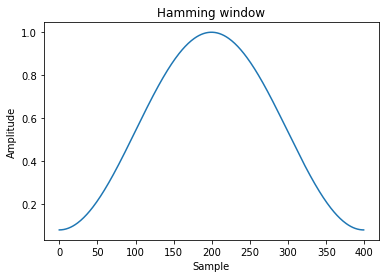

In [105]:
#creating hamming window to the signal
import matplotlib.pyplot as plt
from scipy import signal

window = signal.hamming(M)
print(np.shape(window))
plt.plot(window)
plt.title("Hamming window")
plt.ylabel("Amplitude")
plt.xlabel("Sample")



In [106]:
#applying hamming window to the signal
b=np.zeros((np.shape(a)))
for i in range(NW):
  b[:,i]=np.multiply(a[:,i],window)

#b is the modified signal
# 

In [107]:
#applying fft on modified signal
from scipy.fftpack import fft
b_bar=np.zeros((256,NW))
for i in range(NW):
  b_bar[:,i]=abs(fft(b[:,i],256)) #256 point fft
print(np.shape(b_bar))
#keeping first 128 values of fft
c=b_bar[:128,:]
clean_fft=np.log10(c)
print(np.shape(c))

(256, 311)
(128, 311)


In [108]:
#whitening of clean files
#centralizing the data
x=clean_fft

mean=np.zeros(128)
for i in range(NW):
  mean=mean+x[:,i]
mean=mean/NW

#(x-mean)
x_bar=np.zeros((np.shape(x)))
for i in range(NW):
  x_bar[:,i]=x[:,i]-mean

#x_bar=np.transpose(x_bar)
print(np.shape(x_bar))

(128, 311)


(128, 311)


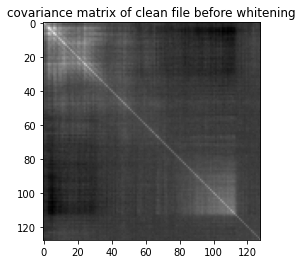

In [109]:
#COVARIANCE MATRIX
import matplotlib.pyplot as plt

from scipy.linalg import fractional_matrix_power as fr
X=x_bar
S=(1/NW)*X@X.T
#print(np.shape(Y))
l,v=np.linalg.eig(S)
idx=l.argsort()[::-1]
l=l[idx]
v=v[:,idx]
                                                                                                                                                                                                                                                                                                              

U=v

r=np.sqrt(l*NW)
#print(r)



print(np.shape(x_bar))

#print(U)
plt.imshow(S,cmap='gray')
plt.title("covariance matrix of clean file before whitening")
plt.show()

(128, 311)
(128, 128)


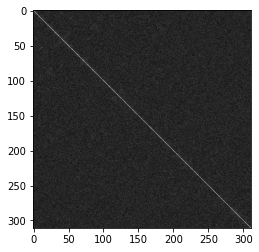

In [110]:
#whitened transform of clean files
import matplotlib.pyplot as plt
#x_bar=np.transpose(x_bar)
print(np.shape(x_bar))
L=np.diag(l)

L_half=fr(L,-1/2)
print(np.shape(U))
y=L_half@np.transpose(U)@x_bar
S=(1/NW)*(np.transpose(y)@y)
plt.imshow(S,cmap="gray")
plt.show()

In [111]:
#adding the absolute of non diagonal elements of covariance matrix
sum=0.0
S_abs=abs(S)
for i in range(128):
  for j in range(128):
    if(i!=j):
      sum=sum+S_abs[i][j]
l=128*127
sum=(sum/l)
print(sum)

0.022279594937339536


In [112]:
diagonal_elments_vector=np.diagonal(S)
print(diagonal_elments_vector.shape)

S-np.diag(diagonal_elments_vector)

(311,)


array([[ 0.        ,  0.11760823,  0.01061202, ...,  0.03906285,
         0.00920004,  0.00607047],
       [ 0.11760823,  0.        ,  0.06165645, ...,  0.00121021,
         0.00720945, -0.01343521],
       [ 0.01061202,  0.06165645,  0.        , ...,  0.01350133,
         0.04834638, -0.00222775],
       ...,
       [ 0.03906285,  0.00121021,  0.01350133, ...,  0.        ,
         0.00468113,  0.01828753],
       [ 0.00920004,  0.00720945,  0.04834638, ...,  0.00468113,
         0.        ,  0.04216329],
       [ 0.00607047, -0.01343521, -0.00222775, ...,  0.01828753,
         0.04216329,  0.        ]])

In [113]:
#finding input of noisy file
#loading noisy wave
from scipy.io import wavfile
import numpy as np
samplerate, data = wavfile.read('clean.wav')

import librosa
librosa.get_duration(filename='clean.wav')

#
#print(np.shape(data))
#here we need 311 windows
NW=311

#segmenting the signal
M=400 #WINDOW LENGTH
N=50000
a=[]

for i in range(NW):
  b=[]
  b=data[160*i:(M+(160*i))]
  a.append(b)
  
a=np.array(a)
a=np.transpose(a)
#print(np.shape(a))



In [114]:
#applying hamming window to the noisy signal
b=np.zeros((np.shape(a)))
for i in range(NW):
  b[:,i]=np.multiply(a[:,i],window)

#b is the modified signal

In [115]:
#applying fft on modified signal
from scipy.fftpack import fft
b_bar=np.zeros((256,NW))
for i in range(NW):
  b_bar[:,i]=abs(fft(b[:,i],256)) #256 point fft
print(np.shape(b_bar))
#keeping first 128 values of fft
c=b_bar[:128,:]
clean_fft=np.log10(c)
print(np.shape(c))

(256, 311)
(128, 311)


In [116]:

#centralizing the data
xn=clean_fft

mean=np.zeros(128)
for i in range(NW):
  mean=mean+xn[:,i]
mean=mean/NW

#(x-mean)
xn_bar=np.zeros((np.shape(xn)))
for i in range(NW):
  xn_bar[:,i]=xn[:,i]-mean

#xn=np.transpose(xn)
print(np.shape(xn_bar))

(128, 311)


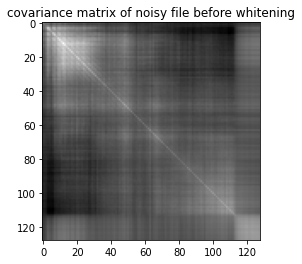

(128, 311)


In [117]:
#FINDING COVARIANCE MATRIX
X=xn_bar
S=(1/NW)*X@X.T
plt.imshow(S,cmap='gray')
plt.title("covariance matrix of noisy file before whitening")
plt.show()
print(np.shape(X))

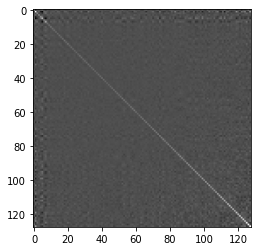

In [118]:
#applying whitening transform of clean file to noisy file
y=L_half@np.transpose(U)@(X)
#covariance matrix after whitening
S=S=(1/NW)*(y@y.T)
U=np.transpose(U)
plt.imshow(S,cmap='gray')

In [119]:
#adding the absolute of non diagonal elements of covariance matrix
sum=0.0
S_abs=abs(S)
for i in range(128):
  for j in range(128):
    if(i!=j):
      sum=sum+S_abs[i][j]
l=128*127
sum=(sum/l)
print(sum)

0.12236253369723618
